# Exploratory Data Analysis of ATP Player Data
---
The goal of this notebook is to perform some exploratory data analysis (EDA) on Association of Tennis Professional (ATP) Player Data that we constructed in the previous notebook. There are three main questions I hope to answer:

- There is much speculation at the moment that matches are getting longer due to heavier balls, changing styles and slower courts. The game has developed from a serve and volley, chip and charge style of play in the 80s and 90s to a baseline dominated game in the 2000s, 2010s and now 2020s. I want to know if this change has affected the average length of matches despite some efforts by the ATP to speed up the time between points e.g. introduction of harsher time penalties in 2013 and the on-court shot clock.

- Like many modern sports, because of better, science driven methods of physical training, players are getting faster, stronger and taller. I want to know if this is the case in tennis, particularly whether the average height of top players has increased over time.

- There is a common thought amongst tennis players that being left handed is an advantage, especially when serving. I want to know if the average left handed player wins more service games than right handed players, and whether they win more matches.

Additionally, I will build a simple Linear Regression Model to predict a player's match win rate using basic serve and return stats to see which feature(s) carry the most importance in winning tennis matches.

---

<br>

### Import Necessary Modules 
---

In [53]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

plt.style.use('Solarize_Light2')
sns.set_palette('colorblind')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Load and Inspect Player Data
---

In [54]:
players_by_year = pd.read_csv('players_by_year.csv', index_col=[0])\
                    .sort_values('titles',ascending=False)

players_by_year.year_end_ranking_cat = pd.Categorical(
    players_by_year.year_end_ranking_cat,
    categories=['top10', 'top32', 'top100', '>100'],
    ordered=True) 

players = pd.read_csv('players.csv', index_col=[0])\
            .sort_values('match_wins', ascending=False)

In [55]:
players_by_year.head()

,year,name,id,age,ioc,height,hand,high_rank,high_pts,tourney_plyd,tourney_win_pct,avg_tourney_level,matches_plyd,match_wins,match_win_pct,finals,titles,final_win_pct,slam_finals,slams,atp_finals_finals,atp_finals,masters_finals,masters,500_finals,500_titles,250_finals,250_titles,olympic_g,aces_per_game,df_per_game,sv_game_win_pct,return_game_win_pct,1st_pct,1st_win_pct,2nd_win_pct,1st_return_win_pct,2nd_return_win_pct,bp_per_game,bp_faced_per_game,bp_conversion_rate,bp_saved_rate,tb_win_pct,no1_faced,no1_win_pct,top_5_faced,top_5_win_pct,top_10_faced,top_10_win_pct,top_20_faced,top_20_win_pct,top_50_faced,top_50_win_pct,top_100_faced,top_100_win_pct,matches_w_stats,matches_w_minutes,avg_opponent_rank,avg_opponent_pts,sets_w_stats,sets_w_mins,minutes_per_match,minutes_per_set,year_end_ranking,year_end_points,year_end_ranking_cat
4848,1995,Thomas Muster,101404,28.0,AUT,180.0,L,3.0,4474.0,27,0.444444,648.148148,104,86,0.826923,14,12,0.857143,1,1,0,0,3,3,2,2,8,6,0,0.279866,0.210526,0.807853,0.359167,0.599974,0.712473,0.538563,0.336692,0.572682,0.726667,0.494570,0.494266,0.611486,0.750000,0,NaN,7,0.857143,15,0.800000,26,0.692308,53,0.773585,81,0.814815,99,88,66.638095,1043.933333,257,219,95.261364,38.278539,3,NaN,top10
2262,2006,Roger Federer,103819,25.2,SUI,185.0,R,1.0,7870.0,17,0.705882,1073.529412,97,92,0.948454,16,12,0.750000,4,3,1,1,6,4,2,1,3,3,0,0.533767,0.096013,0.901546,0.315966,0.627019,0.767085,0.588762,0.348046,0.535446,0.735294,0.324654,0.429714,0.696742,0.725490,0,NaN,12,0.666667,23,0.826087,34,0.882353,59,0.915254,87,0.942529,95,95,63.690722,1293.206186,256,256,104.831579,38.902344,1,8370.0,top10
2660,2004,Roger Federer,103819,23.2,SUI,185.0,R,1.0,6760.0,17,0.647059,1102.941176,80,74,0.925000,11,11,1.000000,3,3,1,1,3,3,1,1,3,3,0,0.608649,0.168649,0.915676,0.304740,0.615909,0.782216,0.576438,0.347583,0.517345,0.737020,0.308108,0.413476,0.726316,0.807692,0,NaN,11,1.000000,18,1.000000,27,0.962963,51,0.901961,67,0.910448,74,74,56.407407,1270.444444,194,194,94.621622,36.092784,1,6335.0,top10
2852,2005,Roger Federer,103819,24.2,SUI,185.0,R,1.0,6980.0,15,0.733333,1083.333333,85,81,0.952941,12,11,0.916667,2,2,1,0,4,4,2,2,3,3,0,0.548033,0.139067,0.892040,0.307400,0.629337,0.763056,0.586207,0.346953,0.523485,0.695446,0.299177,0.442019,0.639144,0.717949,0,NaN,8,0.750000,17,0.882353,30,0.900000,56,0.946429,74,0.959459,84,84,50.741176,1220.764706,223,223,103.178571,38.865471,1,6725.0,top10
2844,2005,Rafael Nadal,104745,19.3,ESP,185.0,L,2.0,4475.0,21,0.523810,833.333333,89,79,0.887640,12,11,0.916667,1,1,0,0,5,4,3,3,3,3,0,0.210983,0.126204,0.844894,0.375364,0.691630,0.705187,0.572959,0.368664,0.566243,0.819593,0.432563,0.457988,0.641425,0.640000,2,0.5,3,0.333333,8,0.625000,22,0.818182,51,0.843137,81,0.888889,87,87,54.314607,1077.382022,227,227,113.770115,43.603524,2,4765.0,top10


# Are ATP Matches Getting Longer?
---

In [56]:
df = players_by_year.query('matches_w_minutes >= 10')
set_length_medians = df.groupby('year').minutes_per_set.median()
set_length_means = df.groupby('year').minutes_per_set.mean()

### Creating Figures to Show How Average Set Length Has Changed (1991 - 2023)
---

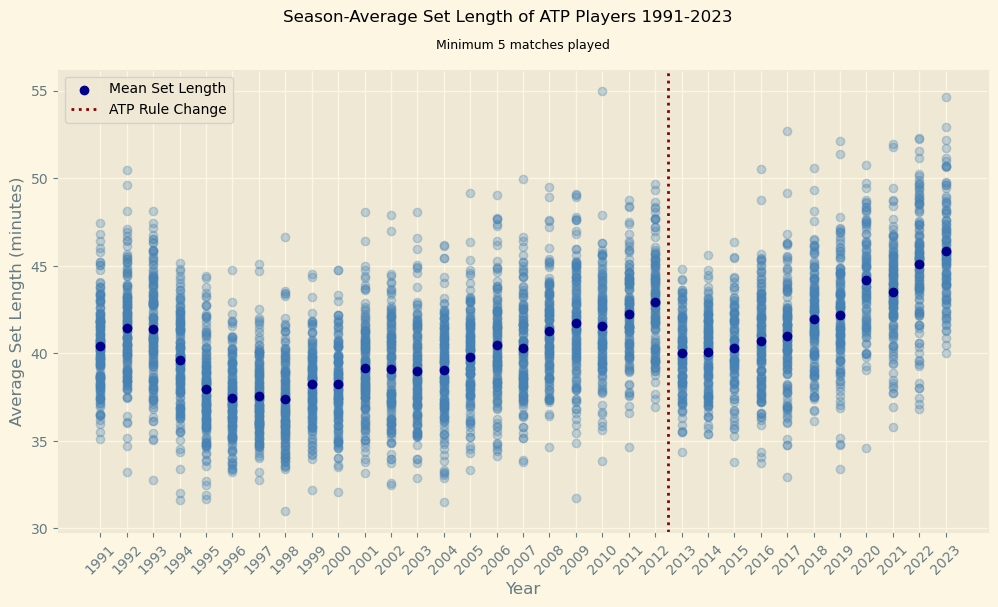

<Figure size 640x480 with 0 Axes>

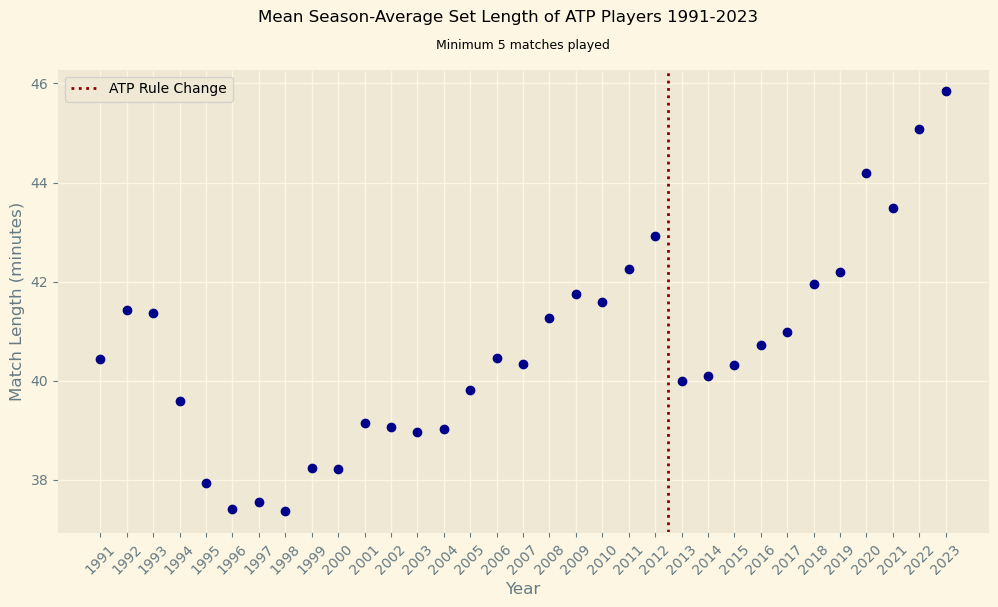

<Figure size 640x480 with 0 Axes>

In [57]:
fig1 = plt.figure(figsize=(12,6))

plt.scatter(x='year', y='minutes_per_set', data=df,
            color='steelblue', alpha=0.3, label=None)

plt.scatter(set_length_means.index, set_length_means,
            label='Mean Set Length', color='darkblue')

plt.axvline(2012.5, color='darkred', linestyle=':', label='ATP Rule Change')

plt.xticks(range(1991, 2024), rotation=45)
plt.xlabel('Year')
plt.ylabel('Average Set Length (minutes)')
plt.legend()
plt.suptitle('Season-Average Set Length of ATP Players 1991-2023', fontsize=12)
plt.title('Minimum 5 matches played', fontsize=9, pad=15)
plt.show()
plt.clf()


fig2 = plt.figure(figsize=(12, 6))

plt.scatter(set_length_means.index, set_length_means, alpha=1, color='darkblue')

plt.axvline(2012.5, linestyle=":", color='darkred', label='ATP Rule Change')

plt.xticks(range(1991, 2024), rotation=45)
plt.ylabel('Match Length (minutes)')
plt.suptitle('Mean Season-Average Set Length of ATP Players 1991-2023',
             fontsize=12)
plt.title('Minimum 5 matches played', fontsize=9, pad=15)
plt.xlabel('Year')
plt.legend()
plt.show()
plt.clf()


## Conclusion On Longer Matches
---
Fig1 and Fig2 clearly shows that since 1996, ATP matches have become steadily longer. The mid nineties saw serve and volley reach its peak with dominant servers like Pete Sampras, Goran Ivanisevic and Greg Rusedski playing on very fast courts. In the early 2000s there was a significant transition, with many players preferring to stay on the baseline in long rallies, rarely coming forward unless to finish a point. Quickly advancing racket and string technology also allowed players to generate massive spin and power, making players at the net much easier to pass with dipping balls.

One thing to note, and marked on the figures above, is the rule change the ATP implemented at the end of the 2012 season which saw umpires able to more harshly penalise players who took too long between points. This had an immediate effect which saw the average set length drop from nearly 43 minutes in 2012 compared to 40 in 2013. However this did not last, as sets continued to increase in length, and surpassed the pre-2013 levels by the 2020 season.

One possibility for the sharp increase of set length between 2019 and 2020 was the pandemic. The pandemic saw another change in the tour whereby players were no longer passed their towel between points by ball boys - instead having to retrieve it themselves. Umpires definitely became more lenient during this time to allow players time to get their towel and towel-off before starting the next point. While only taking a few extra seconds, over the course of a match which can be hundreds of points long, this could definitely be a factor in making matches significantly longer in 2020.

Another interesting thing to take note of is the player in 2010 that had an average set length of 55 minutes, much higher than any other player in this 30 year period. I immediately thought it must be one of John Isner or Nicolas Mahut, who at the 2010 Wimbledon championships played the longest match (and set) in history at 11 hours and 5 minutes, with just the final set taking 8 hours 11 minutes - this one set was longer than the previous longest match in history (6h33m). Because Mahut was a relatively low ranked player compared to Isner, the match had a bigger effect on Mahut's aggregated stats for the season as he played much fewer matches on the tour (10 compared to Isner's 62).

Overall I believe fig1 and fig2 show strong evidence of increasing set (and therefore match) length, most probably due to slowing court surfaces and more defensive baseline play.

---

<br><br><br>



# Are Top ATP Players Getting Taller?
---
With modern training methods and advances in sports science, being very tall is no longer seen as the disadvantage it used to be. Tennis is all about your ability to move laterally on the court, and while taller players used to have an advantage with power and on serve, they would often suffer in their ability to move effectively laterally or to low balls. However, in recent years we have seen taller players begin to appear in the later stages or grand slams and at the top of the rankings. In 2009 Juan Martin del Potro became the tallest player ever to win a grand slam at 6'6", and in 2022 Daniil Medvedev, also 6'6", became the tallest world no. 1 ranked player ever. 

Players under 6 feet tall were regular winners of grand slams in 20th century, with greats like Ken Rosewall (5'7), Rod Laver (5'8), Bjorn Borg (5'11), Michael Chang (5'9) and Andre Aggassi (5'11) picking up multiple titles. However, the last player under 6 feet tall to win a slam was Gaston Gaudio (5'9) in 2004 and as of July 2023, the highest ranked player under 6 feet is Adrian Mannarino at no. 27 - hardly a threat at the biggest tournaments. It wouldn't be a surprise to me if we never see a player under 6 feet tall win a slam again, unless there is another significant change in how the sport is played - the disadvantages are simply too great. But does this trend apply to all top players, and how much taller are they now than in the past?

In [58]:
df = players_by_year.query('year_end_ranking <= 500')
df = df[df.height.notna()] # Only include players who have a listed height

heights = df.groupby(['year', 'year_end_ranking_cat'],
                     as_index=False).height.mean()

In [59]:
def add_year_cats(year): 
    """Adds Decades to Player Dataset"""
    if year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    return '2020s'

In [60]:
df['year_cat'] = df.year.apply(add_year_cats)

In [61]:
heights.head(8)

,year,year_end_ranking_cat,height
0,1991,top10,187.900000
1,1991,top32,183.772727
2,1991,top100,184.117647
3,1991,>100,182.968000
4,1992,top10,187.000000
5,1992,top32,184.090909
6,1992,top100,183.428571
7,1992,>100,183.869919


### Comparing Heights of Players at Different Rankings Every Year Since 1991
---

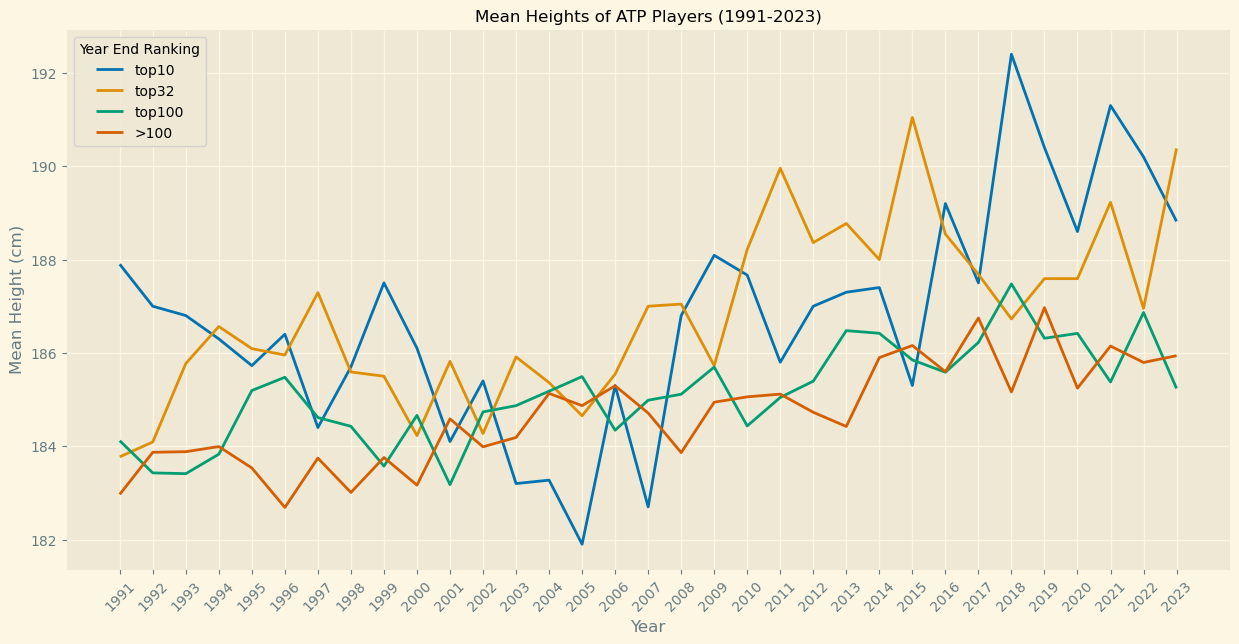

<Figure size 640x480 with 0 Axes>

<Figure size 2000x800 with 0 Axes>

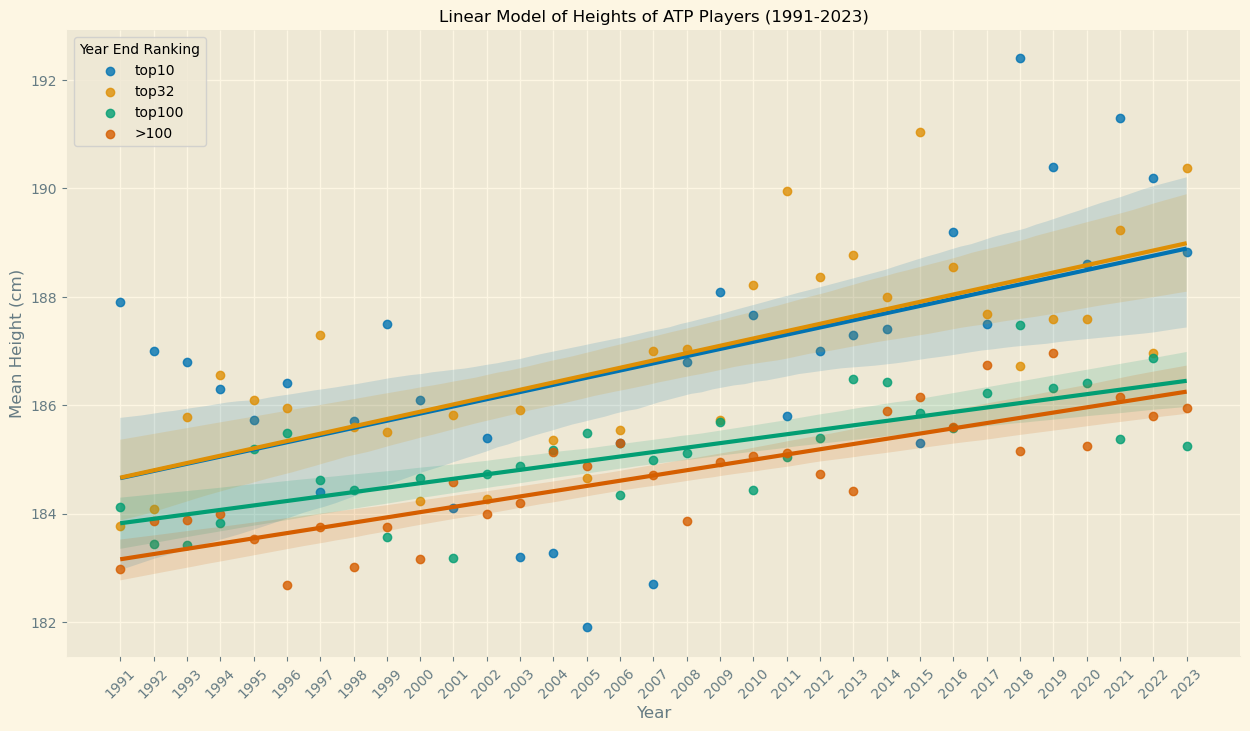

In [62]:
fig3 = plt.figure(figsize=(15,7))

sns.lineplot(x='year', y='height', data=heights, hue='year_end_ranking_cat')

plt.xticks(range(1991, 2024),rotation=45)
plt.title('Mean Heights of ATP Players (1991-2023)', fontsize=12)
plt.ylabel('Mean Height (cm)')
plt.xlabel('Year')
plt.legend(title='Year End Ranking')
plt.show()
plt.clf()

fig4 = plt.figure(figsize=(20,8))

sns.lmplot(x='year', y='height', data=heights,
           hue='year_end_ranking_cat', height=7, aspect=1.8, legend=False)

plt.xticks(range(1991, 2024),rotation=45)
plt.title('Linear Model of Heights of ATP Players (1991-2023)', fontsize=12)
plt.ylabel('Mean Height (cm)')
plt.xlabel('Year')
plt.legend(title='Year End Ranking')
plt.show()

### Comparing Heights of Players, Aggregated Over Each Decade Since 1990
---

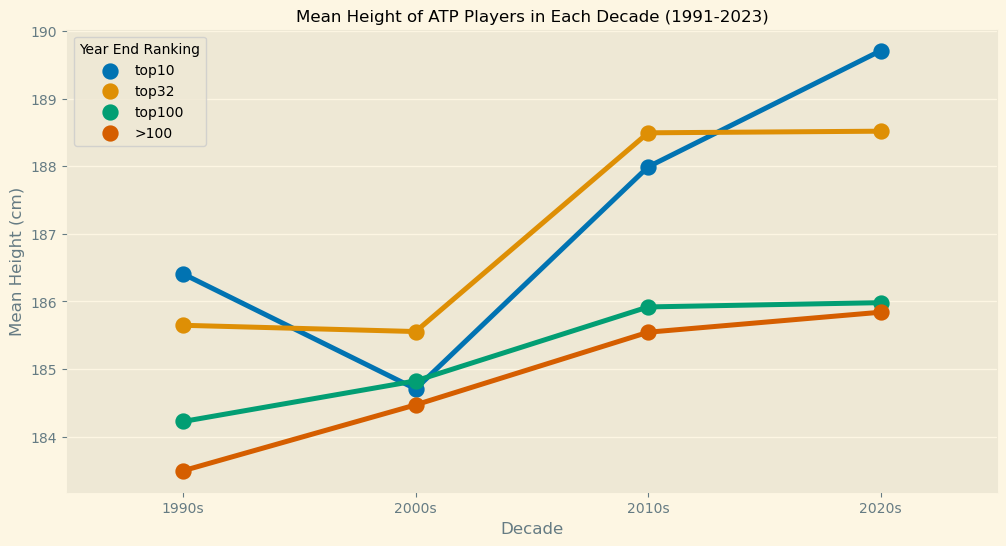

<Figure size 640x480 with 0 Axes>

In [63]:
heights_decade = df.groupby(['year_cat', 'year_end_ranking_cat'],
                            as_index=False).height.mean()

fig5 = plt.figure(figsize=(12, 6))
sns.pointplot(x='year_cat', y='height', data=heights_decade,
              hue='year_end_ranking_cat')

plt.legend(title='Year End Ranking')
plt.title('Mean Height of ATP Players in Each Decade (1991-2023)', fontsize=12)
plt.ylabel('Mean Height (cm)')
plt.xlabel('Decade')
plt.show()
plt.clf()

## Conclusions on ATP Player Heights
---
From figures 3-5 it is clear that overall there is a trend that ATP players are getting taller at all levels of the professional game. The most interesting thing for me is the decrease in the height of top 10 players in the mid 2000s - I attribute this to the transition from serve and volley being the dominant style in the 1990s to a baseline dominated style in the 2000s. Whereas serve and volley traditionally favoured tall, serve dominant players who could get into the net and finish points quickly, baseliners rely on their ability to cover the court laterally, extend points and wear down their opponents. 2005 saw the lowest average height of top players ever, with not a single player in the top 10 that year predominantly serving and volleying. 

However, this resurgence of shorter players was short-lived as year upon year since 2005, players have gradually gotten taller and taller. The average top 10 player in 2020s is nearly 10cm (4 inches) taller than in 2005, and 5cm taller than the serve and volley players of the 90s. Being taller also seems to have an impact on a players ability to climb the rankings - bar the short transitional period in the early 2000s, players in the top 32 and top 10 have been consistently taller than those in the top 100 and lower. Tall players can hit the ball harder, from a greater height and can now move just as well as their shorter counterparts. Daniil Medvedev is the perfect example of this - at 6'6 (198cm) he is the tallest world number 1 ever, and got to the top of the rankings not from the aggressive style of play usually associated with players of his height, but rather as a defensive counter-puncher who stays back and can break serve regularly. His height however still means his serve is incredibly strong, meaning he himself often holds comfortably.

Whereas once the 'perfect' height of top tennis players was once around 6'1 - 6'3 (as demonstrated by the 'Big 4' - all between this range), in the years to come it may become higher and higher. Having said this, the hottest player in the world right now, Carlos Alcaraz, could be changing the mould once again - bringing a highly aggressive, all-court game with incredible speed. Slightly shorter than most of his peers at 6'0, Carlos is proving that you still don't need to be excessively tall to dominate the tour, and maybe more like him will follow.

--- 
<br><br><br>





# Do Left Handed Players Perform Better Than Right Handed Players?
---
It is often said in the community that being left handed is an advantage in tennis, especially when serving. One of the greatest players of all time and famous left-hander, Rafael Nadal, is actually naturally right handed, but his uncle and long-time coach Toni convinced Rafa to play left-handed from a young age to maximise his advantage. The thought is that because lefties are so rare (10% of general population), the vast majority of players grow up, play and train with other right hander's, and because of this they get used to the direction and spin the ball comes at them with. But when you play a left hander, that is suddenly reversed - a slice backhand that used to fade out to your forehand now fades into your body. A flat, out-wide serve to your backhand now moves further away from you because of the slice the left hander is able to put on the ball. Many players take time to adjust to these changes, and the result, or general consensus is that left hander's hold serve more often. But is this the case at the top of the game?

I will conduct a hypothesis test to determine whether left handers have an advantage over right handers in several, significant serving statistics like service game win percentage, break point save rate and match win percentage, using random samples from each sub set of players. I will also see if the distribution of left handed players is significantly different from the general population. If being left handed provided no advantage, you would expect the proportion of lefties to be the same in ATP players as in the general population - this will act as the Null Hypothesis.

## Are There Significantly More Left Handers on the ATP Tour Than In The General Population? - Binomial Hypothesis Test
---
It is widely accepted that the world-wide percentage of left-hand dominated people is around 10%. I will use this figure to conduct a binomial test to determine if the proportion of left handed players on the ATP tour is greater than that of the general population.

Null Hypothesis - No more than 10% of players on the ATP Tour are left handed.

Alternative Hypothesis - More than 10% of players on the ATP Tour are left handed

### Take A Random Sample of ATP Players
---

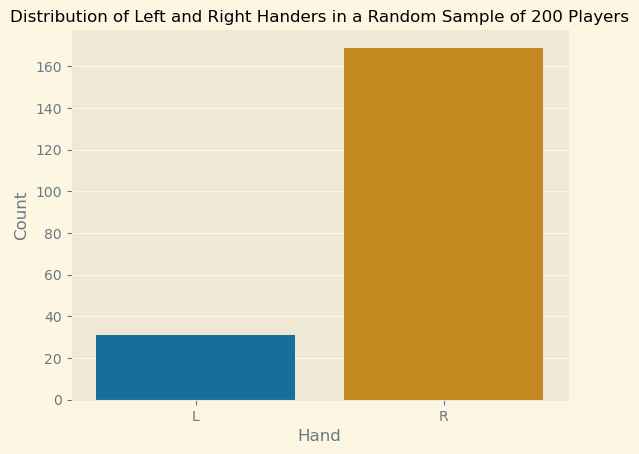

<Figure size 640x480 with 0 Axes>

In [64]:
# Only include players who have played at least 50 career matches
df2 = players.query('(hand == "R" or hand == "L") and (matches_plyd > 50)') 
sample = df2.sample(n=200, random_state=0)
hand_counts = sample.hand.value_counts().sort_values()

sns.barplot(x=hand_counts.index, y=hand_counts.values)

plt.title('Distribution of Left and Right Handers '\
          'in a Random Sample of 200 Players', fontsize=12)
plt.xlabel('Hand')
plt.ylabel('Count')
plt.show()
plt.clf()


### Perform a Binomial Test On Random Sample of ATP Players
---

In [65]:
from scipy.stats import binomtest

k = len(sample[sample.hand=='L'])   # No. of left handed players in the sample
n = len(sample)  # No. of players in samples
significance_threshold = 0.05   # Significance threshold for hypothesis test
p = 0.1  # Probability of being left-handed

result = binomtest(k, n, p, alternative='greater') 
print(f'P-Value: {result.pvalue}')

if result.pvalue < significance_threshold:    # 
    print('Reject the Null Hypothesis. There is a greater proportion '\
          'of left handed ATP players than in the general population.')
else:
    print('Accept the Null Hypothesis. There is not a greater proportion '\
          'of left handed ATP players than in the general population.')

P-Value: 0.00950831194697318
Reject the Null Hypothesis. There is a greater proportion of left handed ATP players than in the general population.


## Do Left Handed ATP Players Perform Better On Serve? A Random Sample of 100 Left and 100 Right Handed Players
---

In [66]:
# Take a random sample of 100 right handed and 100 left handed players
lefties_sample = df2[df2.hand=='L'].sample(100, random_state=0) 
righties_sample = df2[df2.hand=='R'].sample(100, random_state=0)
sample_all = pd.concat([lefties_sample, righties_sample])

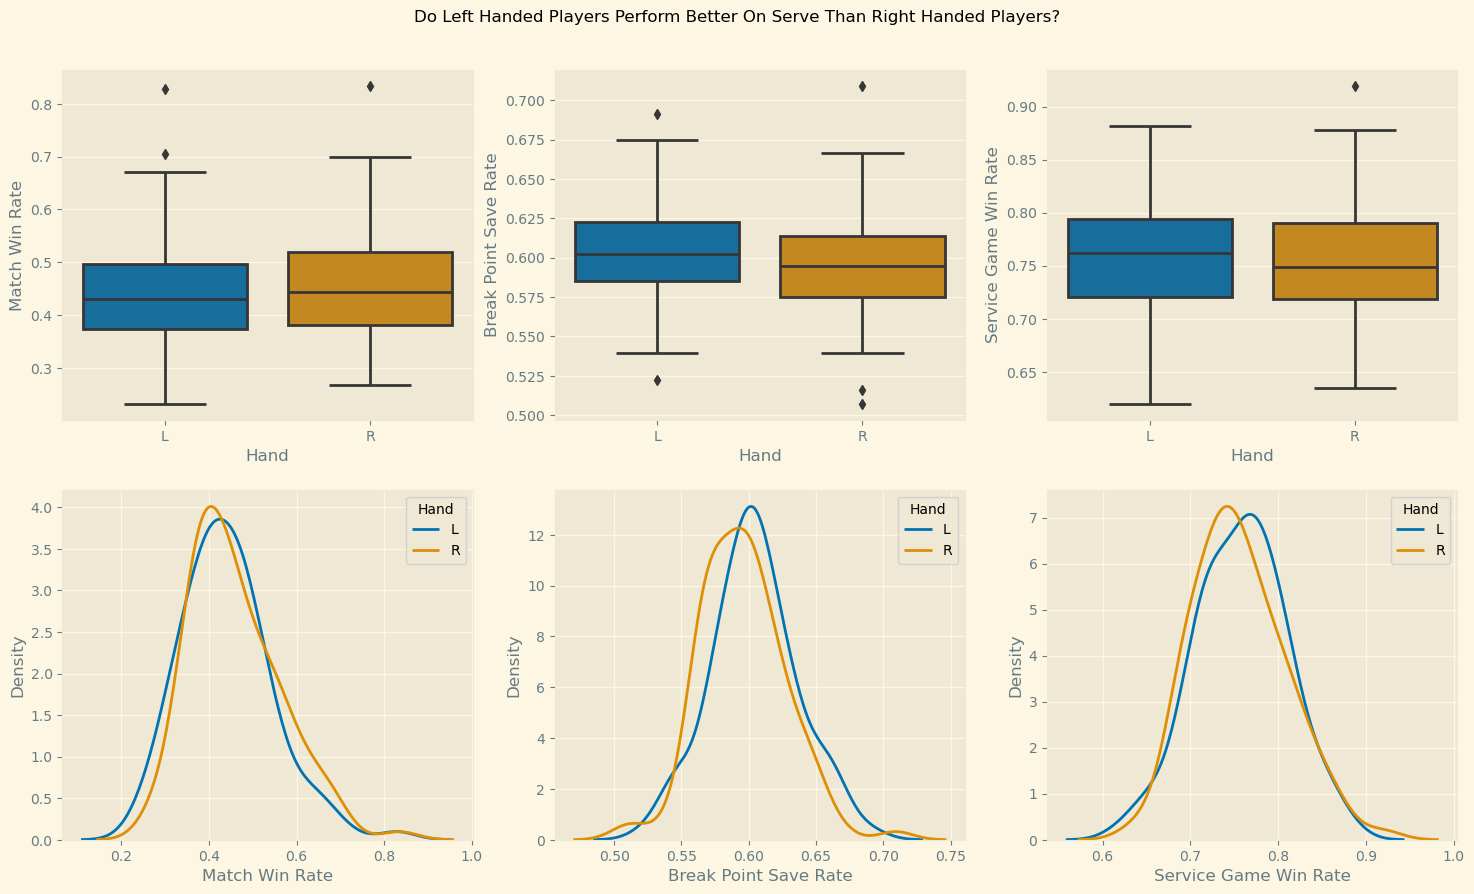

<Figure size 640x480 with 0 Axes>

In [67]:
fig6 = plt.figure(figsize=(18, 10))

plt.suptitle('Do Left Handed Players Perform Better'\
             ' On Serve Than Right Handed Players?', y=.94)

plt.subplot(2, 3, 1)
sns.boxplot(x='hand', y='match_win_pct', data=sample_all, palette='colorblind')
plt.xlabel('Hand')
plt.ylabel('Match Win Rate')

plt.subplot(2, 3, 2)
sns.boxplot(x='hand', y='bp_saved_rate', data=sample_all)
plt.xlabel('Hand')
plt.ylabel('Break Point Save Rate')

plt.subplot(2, 3, 3)
sns.boxplot(x='hand', y='sv_game_win_pct', data=sample_all)
plt.xlabel('Hand')
plt.ylabel('Service Game Win Rate')

plt.subplot(2, 3, 4)
sns.kdeplot(lefties_sample.match_win_pct, label='L')
sns.kdeplot(righties_sample.match_win_pct, label='R')
plt.xlabel('Match Win Rate')
plt.legend(title='Hand')

plt.subplot(2, 3, 5)
sns.kdeplot(lefties_sample.bp_saved_rate, label='L')
sns.kdeplot(righties_sample.bp_saved_rate, label='R')
plt.xlabel('Break Point Save Rate')
plt.legend(title='Hand')

plt.subplot(2, 3, 6)
sns.kdeplot(lefties_sample.sv_game_win_pct, label='L')
sns.kdeplot(righties_sample.sv_game_win_pct, label='R')
plt.xlabel('Service Game Win Rate')
plt.legend(title='Hand')


plt.show()
plt.clf()

### Perform Two Sample T-Tests To Determine If Left Handed Players Perform Significantly Better On Serve
---

Since each distribution of each sample are roughly normally distributed and variances are roughly equal, they are suitable for a two sample T-Test to determine significance (using same significance threshold of 0.05).

In [68]:
from scipy.stats import ttest_ind

for stat in ['match_win_pct', 'bp_saved_rate', 'sv_game_win_pct']:

    print(f"\nTesting: Are left-handed player's {stat} significantly"\
          "higher than right handed players?")

    result = ttest_ind(lefties_sample[stat], righties_sample[stat],
                       alternative='greater')
    
    print(f'P-value: {result.pvalue:.3f}')
    
    if result.pvalue < significance_threshold:
        print('Yes. Reject the Null Hypothesis.')
    else:
        print('No. Accept the Null Hypothesis.')



Testing: Are left-handed player's match_win_pct significantlyhigher than right handed players?
P-value: 0.904
No. Accept the Null Hypothesis.

Testing: Are left-handed player's bp_saved_rate significantlyhigher than right handed players?
P-value: 0.031
Yes. Reject the Null Hypothesis.

Testing: Are left-handed player's sv_game_win_pct significantlyhigher than right handed players?
P-value: 0.384
No. Accept the Null Hypothesis.


## Conclusions On Left Handed Vs. Right Handed Players
---
From the results of the two sample t-tests we can see that whilst a random sample of left handed players do save break points more effectively than right handed players, the percentage of service games they win, and matches they win are not significantly different from their right handed counterparts at the highest level of the game. However, the proportion of left handed players on the tour is significantly more than in the general population, suggesting that being left handed may make significant difference when trying to break through the lower professional ranks into the main tour. Perhaps it is not surprising that at the very highest level of the sport, the subtle differences between a left and right handers spins do not have as big an effect. The top players have simply played more, trained more, and are more adaptable to different play styles.

So while making your child prodigy play with their non-dominant hand may initially help them become a great tennis player, it doesn't necessarily make them Rafael Nadal.

---

<br><br><br>

# Building A Simple Linear Regression Model To Predict Match Win Rate From Service Stats
---
In the final part of this notebook I shall use a simple Linear Regression Model to predict a players match win rate based on their basic serve return stats. I will use the coefficients of the model to rank which features carry the most importance in winning tennis matches. 

In [69]:
columns = ['1st_pct', '1st_win_pct','2nd_win_pct',
           '1st_return_win_pct', '2nd_return_win_pct',
           'bp_conversion_rate', 'bp_saved_rate', 'tb_win_pct']

target = ['match_win_pct']

In [70]:
df3 = players_by_year.query('matches_plyd > 10')[columns + target]\
                     .reset_index(drop=True)

df3.head()

,1st_pct,1st_win_pct,2nd_win_pct,1st_return_win_pct,2nd_return_win_pct,bp_conversion_rate,bp_saved_rate,tb_win_pct,match_win_pct
0,0.599974,0.712473,0.538563,0.336692,0.572682,0.494266,0.611486,0.750000,0.826923
1,0.627019,0.767085,0.588762,0.348046,0.535446,0.429714,0.696742,0.725490,0.948454
2,0.615909,0.782216,0.576438,0.347583,0.517345,0.413476,0.726316,0.807692,0.925000
3,0.629337,0.763056,0.586207,0.346953,0.523485,0.442019,0.639144,0.717949,0.952941
4,0.691630,0.705187,0.572959,0.368664,0.566243,0.457988,0.641425,0.640000,0.887640


### Checking for Correlation and Multicollinearity
---
Before performing multiple linear regression it is important to check that all of our features are linearly related to our target variable, and that none of our features are themselves strongly correlated with other features in the data set i.e. no multicollinearity. To do this I will make a correlation matrix of all the features and remove any that either show no correlation to match win percentage, or are strongly correlated to another feature in the dataset.

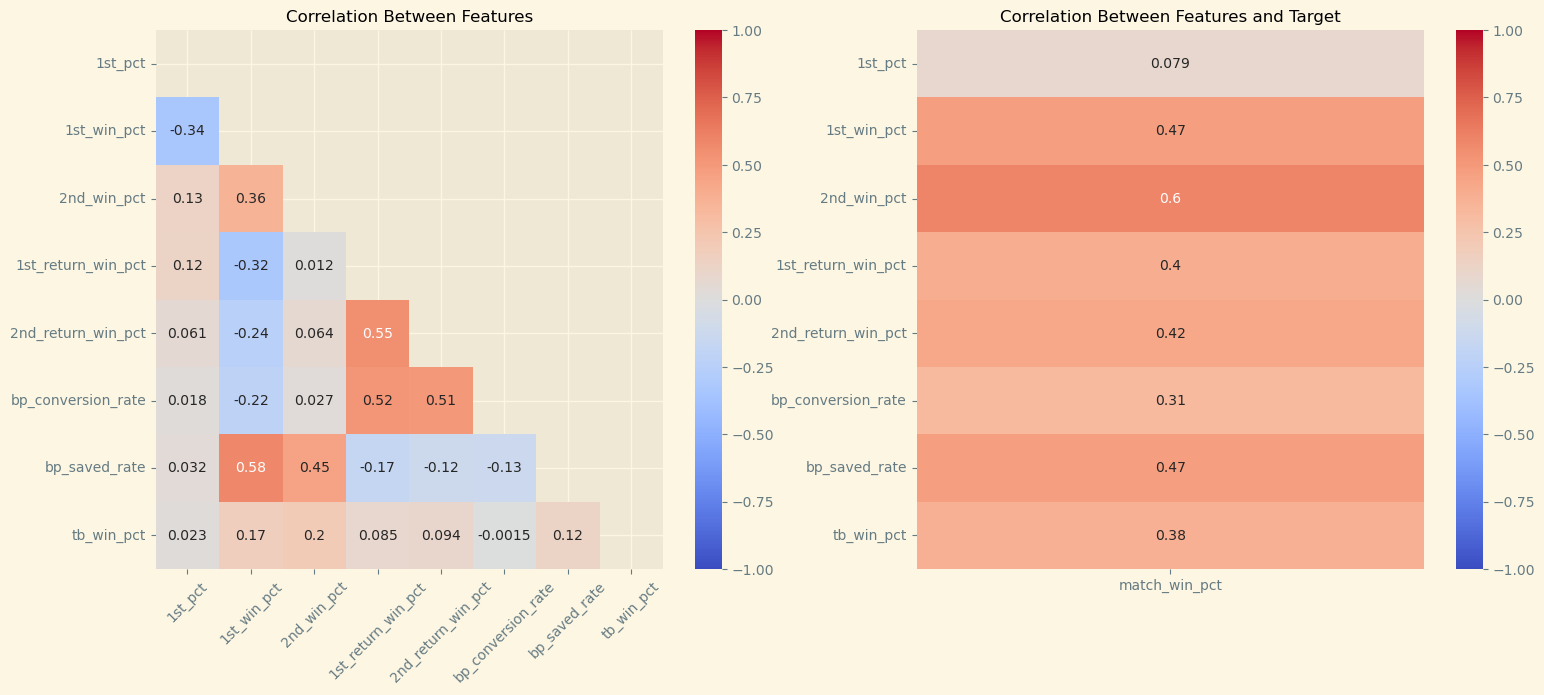

<Figure size 640x480 with 0 Axes>

In [71]:
corr_matrix = df3.corr()
# Mask to only include bottom half of heatmap.
mask = np.triu(corr_matrix.iloc[:-1, :-1])

plt.figure(figsize=(18, 7))

# Exclude match win percentage from the first heatmap using [:-1,:-1]
plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix.iloc[:-1,:-1], annot=True, cmap='coolwarm',
            mask=mask, vmin=-1, vmax=1)
plt.title('Correlation Between Features', fontsize=12)
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.heatmap(corr_matrix.iloc[:-1,-1:], annot=True, cmap='coolwarm',
            vmin=-1, vmax=1)
plt.title('Correlation Between Features and Target', fontsize=12)
plt.show()
plt.clf()

It is immediately obvious from the above figure that 1st serve percentage (1st_pct) is not correlated with match win percentage, and therefore is not useful to us for this linear regression problem and will be removed. None of the features in the dataset are strongly correlated with each other (0.7 +), therefore it is safe to assume there is no multicollinearity.

In [72]:
updated_columns = ['1st_win_pct','2nd_win_pct',
                   '1st_return_win_pct', '2nd_return_win_pct',
                   'bp_conversion_rate', 'bp_saved_rate', 'tb_win_pct']

### Writing a Function to Perform Multiple Linear Regression, Print Scores and Plot Coefficients
___

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

def linear_regression(data, x, y, train_split=0.8):
    """ Performs Linear Regression on Data, Calculates Accuracy Score and
    Plots Coefficients
    """

    all_cols = x + [y]
    df = data[all_cols]
    df = df[~df.isnull().any(axis=1)]  # Remove rows with missing data. 
    Y = df[y]
    X = df[x]

    print(f'Testing: How {", ".join(x)} is a predictor of {y}\n')

    x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                        train_size=train_split,
                                                        test_size=1-train_split,
                                                        random_state=42)

    lrg = LinearRegression()
    lrg.fit(x_train, y_train)
    y_prediction = lrg.predict(x_test)

    test_score = lrg.score(x_test, y_test)
    train_score = lrg.score(x_train, y_train)
    print(f'Test Score: {test_score}')
    print(f'Train Score: {train_score}')

    coefs = lrg.coef_
    df = pd.DataFrame({'feature': x, 
                       'coefficient': coefs
                       }).sort_values('coefficient', ascending=False)

    fig = plt.figure(figsize=(12, 7)).tight_layout()
    
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_prediction, alpha=0.4)
    plt.plot([0,1],[0,1], c='r', linestyle='dotted', alpha=.5)
    plt.title(f"{y} vs Predicted {y} (Test Data)", pad=15, fontsize=12)
    plt.text(0, 0.98, f'Accuracy Score: {test_score:.3f}',
             bbox = {'facecolor': 'oldlace', 'alpha': 0.5, 'pad': 8})
    plt.xlabel(f"{y}: $Y_i$")
    plt.ylabel("Predicted: $\hat{Y}_i$")
    

    plt.subplot(1,2,2)
    plt.title('Regression Coefficients', fontsize=12)
    sns.barplot(y='feature', x='coefficient', data=df, palette='colorblind')
    plt.xlabel('Coefficient')
    plt.ylabel(None)

    plt.subplots_adjust(right=1.6)
    plt.show()
    plt.clf()

Testing: How 1st_win_pct, 2nd_win_pct, 1st_return_win_pct, 2nd_return_win_pct, bp_conversion_rate, bp_saved_rate, tb_win_pct is a predictor of match_win_pct

Test Score: 0.8251762018309332
Train Score: 0.8123181871116825


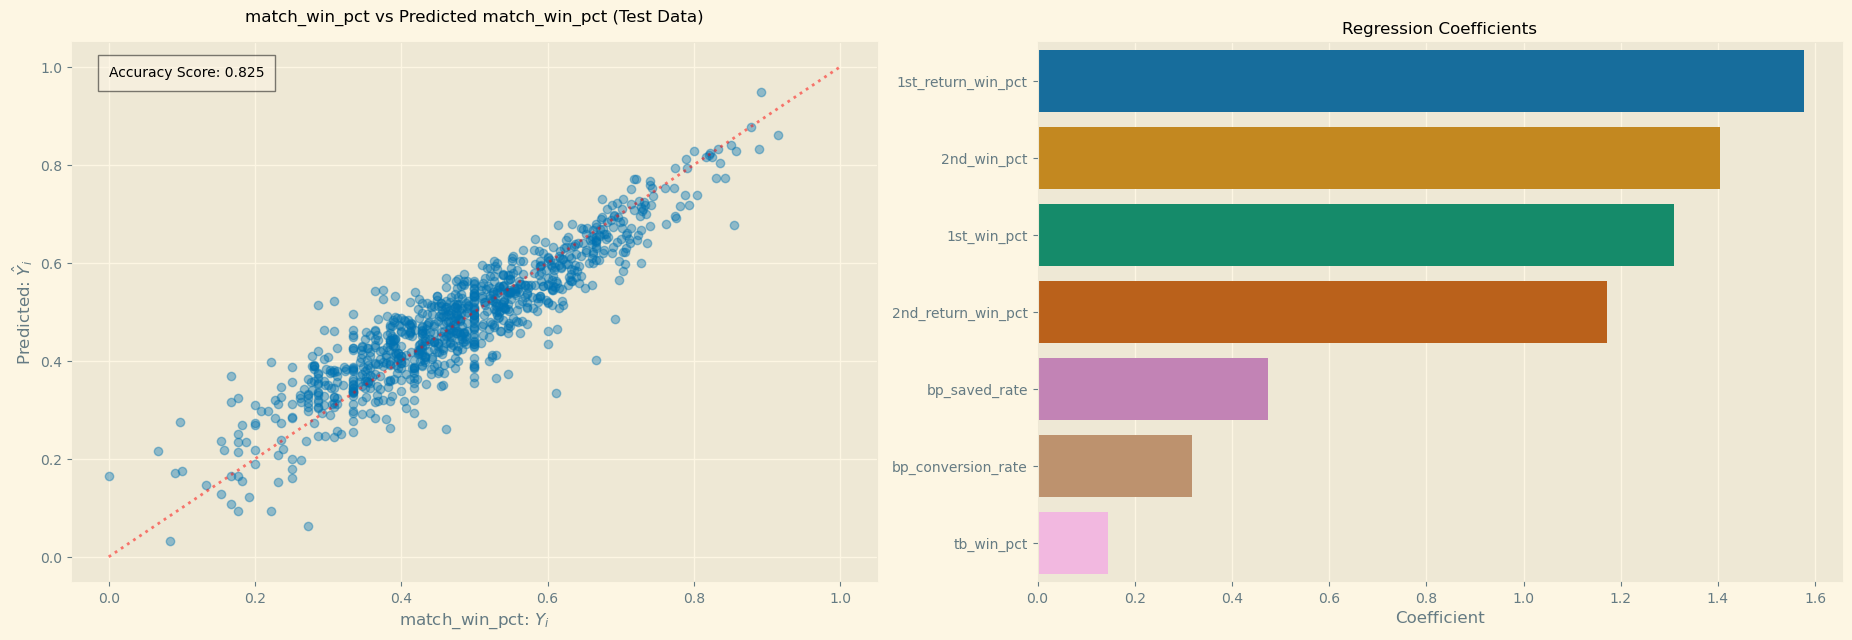

<Figure size 640x480 with 0 Axes>

In [74]:
linear_regression(data=df3, x=updated_columns, y='match_win_pct') 

## Conclusions On Simple Linear Regression
---
The Multiple Linear Regression did a pretty good job of predicting match win rate of players on the ATP tour, with the selected features accounting for around 80% of the variance in both training and test data. Before seeing the coefficients I would have predicted that second serve win percentage and second serve return win percentage would be the strongest predictors - this is because often second serves are a much more neutral start to a point than first serves, and the player who is winning the majority of neutral points will be the stronger of the two and therefore more likely to win the match. However, looking at the coefficients, our regression model has 1st serve return win percentage as the most important feature. This makes sense as a player who is returning well on first serve is also likely returning well on second serve - the result of which is many opportunities in opponents service games, which ultimately leads to breaks, sets and match wins. 

Another interesting coefficient is the relatively low impact of break point conversion rate - suggesting that it is more important to create opportunities than the rate at which you convert them. Roger Federer famously had a very low break point conversion rate yet is one of the greatest players of all time. Even though Federer was less likely to win a break point than his two greatest rivals Rafa Nadal and Novak Djokovic, he created just as many if not more chances to do so, and was also the strongest of the three on his own serve for the majority of their careers.

In the next notebook I hope to expand on the models used to make predictions about the ATP tour.

---